# Case stude on unsupervised learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

### Load the dataset into the Python environment

In [2]:
df = pd.read_csv(r'C:\Users\Dell\Desktop\Files\Data Science\Assignments\Case study on Unsupervised Learning\Wine_clust .csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [4]:
df.shape

(178, 13)

In [5]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [6]:
correlation_matrix = df.corr()

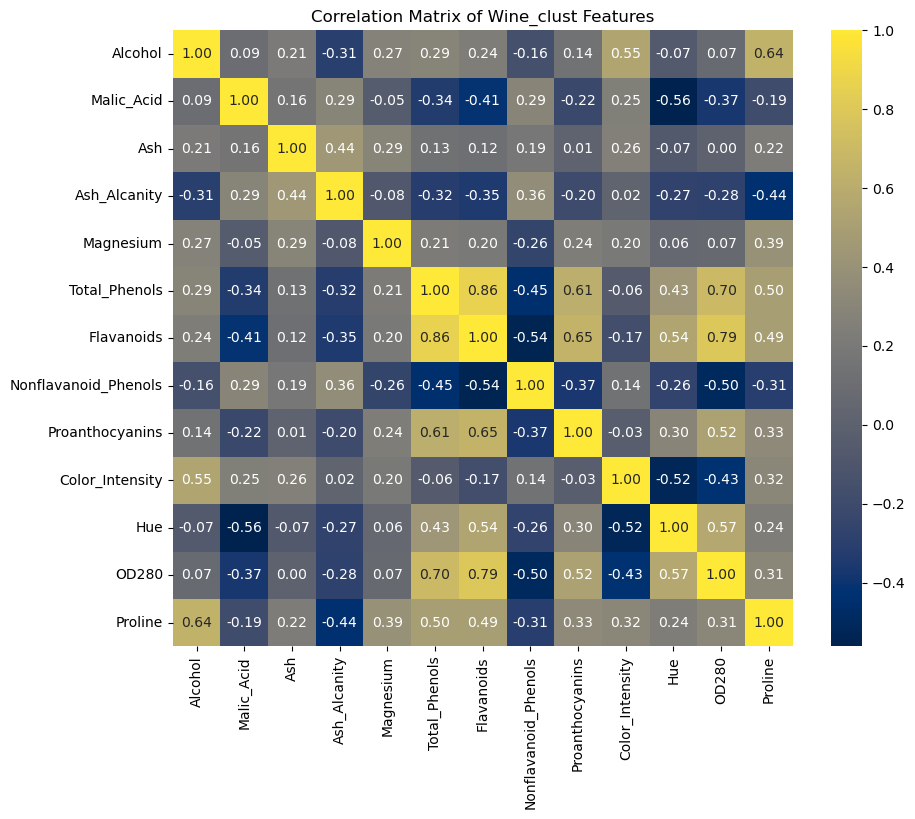

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='cividis', fmt=".2f")
plt.title('Correlation Matrix of Wine_clust Features')
plt.show()

# K-Means method

In [8]:
X1 = df.copy()

In [9]:
X1.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [10]:
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)

In [11]:
K_range = range(1,11)
inertia_values = []

In [12]:
for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=0)
    kmeans.fit(X1_scaled)
    inertia = kmeans.inertia_
    inertia_values.append(inertia)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

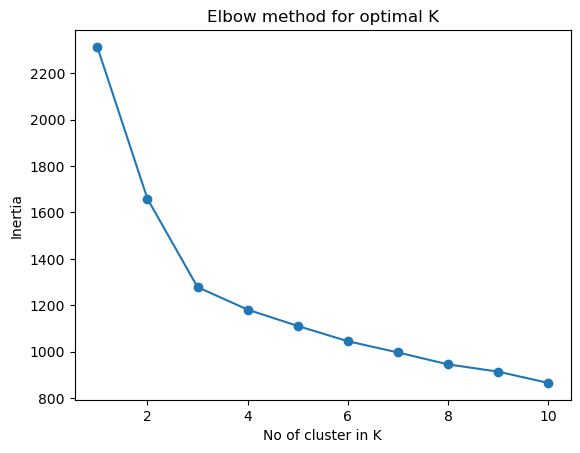

In [13]:
plt.plot(K_range,inertia_values,marker='o')
plt.title('Elbow method for optimal K')
plt.xlabel('No of cluster in K')
plt.ylabel('Inertia')
plt.show()

__Optimal k value = 3__

In [14]:
kmeans = KMeans(n_clusters=3, random_state=0)
cluster_labels = kmeans.fit_predict(X1)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [15]:
X1['Cluster'] = cluster_labels

In [16]:
X1.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


In [17]:
silhouette_avg = silhouette_score(X1,X1['Cluster'])
silhouette_avg

0.5711566129967665

__A model with 3 number of clusters and silhouette score of 0.5712 is obtained__

# Agglomerative Hierarchical Clustering

In [18]:
X2 = df.copy()

In [19]:
scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)

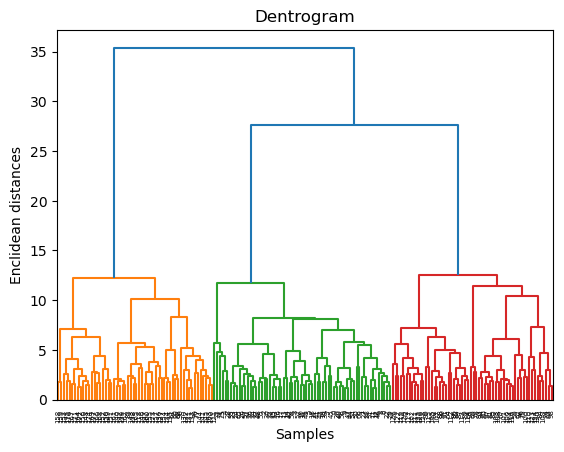

In [20]:
dendrogram = sch.dendrogram(sch.linkage(X2_scaled,method='ward'))
plt.title('Dentrogram')
plt.xlabel('Samples')
plt.ylabel('Enclidean distances')
plt.show()

In [21]:
# Finding best paramenter values
linkage_methods = ['ward', 'complete', 'average', 'single']

best_linkage = None
best_num_clusters = 0
best_score = -1

for linkage in linkage_methods:
    for num_clusters in range(2, 6):
        agg_clustering = AgglomerativeClustering(n_clusters=num_clusters, linkage=linkage)
        cluster_labels = agg_clustering.fit_predict(X2_scaled)
        
        if len(set(cluster_labels)) > 1:
            silhouette_avg = silhouette_score(X2_scaled, cluster_labels)
            if silhouette_avg > best_score:
                best_score = silhouette_avg
                best_linkage = linkage
                best_num_clusters = num_clusters

print(f"Best Silhouette Score: {best_score} with linkage='{best_linkage}' and num_clusters={best_num_clusters}")

Best Silhouette Score: 0.2774439826952265 with linkage='ward' and num_clusters=3


In [22]:
agg_clustering1 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster_labels1 = agg_clustering1.fit_predict(X2_scaled)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [23]:
cluster_labels1

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [24]:
X2_np=X2.values 

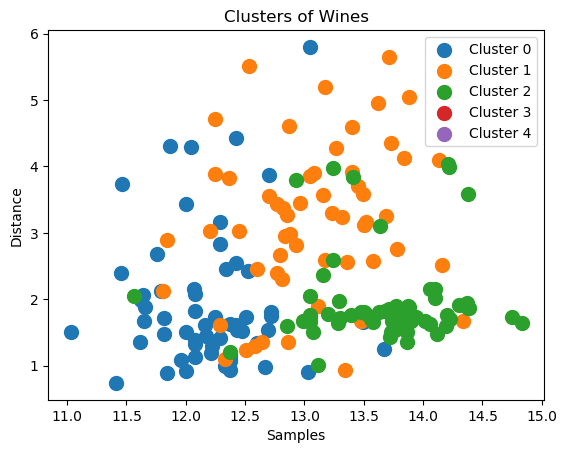

In [25]:
for cluster_label in range(5):
    plt.scatter(X2_np[cluster_labels1 == cluster_label, 0], X2_np[cluster_labels1 == cluster_label, 1], s=100, label=f'Cluster {cluster_label}')
    plt.title('Clusters of Wines')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.legend()
plt.show()

In [26]:
silhouette_avg = silhouette_score(X2_scaled,cluster_labels1)
silhouette_avg

0.2774439826952265

__A model with 3 number of clusters and silhouette score of 0.2774 is obtained__

## Agglomerative Hierarchical Clustering With PCA

In [27]:
pca = PCA(n_components=5)
pca_result = pca.fit_transform(X2_scaled)
X2_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

In [28]:
# Finding best paramenter values
linkage_methods = ['ward', 'complete', 'average', 'single']

best_linkage = None
best_num_clusters = 0
best_score = -1

for linkage in linkage_methods:
    for num_clusters in range(2, 6):
        agg_clustering = AgglomerativeClustering(n_clusters=num_clusters, linkage=linkage)
        cluster_labels = agg_clustering.fit_predict(X2_pca)
        
        if len(set(cluster_labels)) > 1:
            silhouette_avg = silhouette_score(X2_pca, cluster_labels)
            if silhouette_avg > best_score:
                best_score = silhouette_avg
                best_linkage = linkage
                best_num_clusters = num_clusters

print(f"Best Silhouette Score: {best_score} with linkage='{best_linkage}' and num_clusters={best_num_clusters}")

Best Silhouette Score: 0.34679305595565346 with linkage='ward' and num_clusters=3


In [29]:
agg_clustering2 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster_labels2 = agg_clustering2.fit_predict(X2_pca)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [30]:
silhouette_avg = silhouette_score(X2_pca,cluster_labels1)
silhouette_avg

0.3592125452867413

__Silhouette Score has been improved__  
__A model with 3 number of clusters and silhouette score of 0.3468 is obtained__

## DBSCAN

__DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular clustering algorithm used for data analysis and pattern recognition. It groups data points based on their density, identifying clusters of high-density regions and classifying outliers as noise.__

In [31]:
X3 = df.copy()

In [32]:
scaler = StandardScaler()
X3_scaled = scaler.fit_transform(X3)

In [33]:
# Finding best paramenter values
eps_values = [0.1, 0.5, 1.0]
min_samples_values = [3, 5, 8]

best_eps = 0
best_min_samples = 0
best_score = -1

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(X3_scaled)
        num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
        if num_clusters > 1:
            silhouette_avg = silhouette_score(X3_scaled, cluster_labels)
            if silhouette_avg > best_score:
                best_score = silhouette_avg
                best_eps = eps
                best_min_samples = min_samples

print(f"Best Silhouette Score: {best_score} with eps={best_eps} and min_samples={best_min_samples}")

Best Silhouette Score: -1 with eps=0 and min_samples=0


__Fron this result it is clear that DBSCAN with all the features is not possible, so we have to use Principal component analysis (PCA) to reduce data dimensions__

## DBSCAN With PCA

In [34]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X3_scaled)

In [35]:
X3_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])

In [36]:
X3_pca.head()

,PC1,PC2,PC3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688


In [37]:
eps_values = [0.1, 0.5, 1.0]
min_samples_values = [3, 5, 8]

best_eps = 0
best_min_samples = 0
best_score = -1

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(X3_pca)
        num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
        if num_clusters > 1:
            silhouette_avg = silhouette_score(X3_pca, cluster_labels)
            if silhouette_avg > best_score:
                best_score = silhouette_avg
                best_eps = eps
                best_min_samples = min_samples

print(f"Best Silhouette Score: {best_score} with eps={best_eps} and min_samples={best_min_samples}")

Best Silhouette Score: 0.2887279440862169 with eps=1.0 and min_samples=5


__From this result best eps=1.0 and best min_samples=5__

In [38]:
dbscan = DBSCAN(eps=1, min_samples=5)
cluster_labels3 = dbscan.fit_predict(X3_pca)

In [39]:
X3['Cluster_DBSCAN'] = cluster_labels3

In [40]:
X3_np=X3.values 

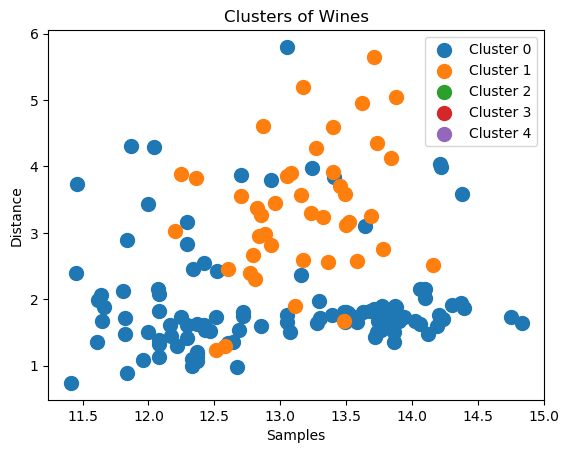

In [41]:
for cluster_label in range(5):
    plt.scatter(X3_np[cluster_labels3 == cluster_label, 0], X3_np[cluster_labels3 == cluster_label, 1], s=100, label=f'Cluster {cluster_label}')
    plt.title('Clusters of Wines')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.legend()
plt.show()

__From this it is clear that number of clusters = 2__

In [42]:
silhouette_avg = silhouette_score(X3_pca,X3['Cluster_DBSCAN'])
silhouette_avg

0.2887279440862169

__A model with 2 number of clusters and silhouette score of 0.2887 is obtained__

## Result

#### K-Means method   
__- Number of clusters = 3__    
__- Silhouette score = 0.5712__  
#### Agglomerative Hierarchical Clustering
__- Number of clusters = 3__    
__- Silhouette score = 0.2774__  
#### Agglomerative Hierarchical Clustering with PCA 
__- Number of clusters = 3__  
__- Silhouette score = 0.3468__  
#### DBSCAN 
__- Number of clusters = -__  
__- Silhouette score = -1__  
#### DBSCAN with PCA 
__- Number of clusters = 2__  
__- Silhouette score = 0.2887__  